In [1]:
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 14.2 MB/s eta 0:00:00


In [21]:
import easyocr
import re

# EasyOCR 모델 로드 (한글과 영어 지원)
reader = easyocr.Reader(['en'], gpu=True)

def run_ocr_easyocr(image_path):
    """
    EasyOCR로 이미지에서 텍스트를 추출
    :param image_path: 이미지 경로
    :return: 감지된 텍스트 리스트
    """
    results = reader.readtext(image_path)
    return [result[1] for result in results]  # 텍스트 리스트 반환

def extract_medicine_names(detected_texts):
    """
    감지된 텍스트 리스트에서 한글과 영어 약품명을 추출
    :param detected_texts: OCR로 추출된 텍스트 리스트
    :return: 약품명 리스트
    """
    medicine_names = []
    for text in detected_texts:

        if re.match(r"^[A-Z][a-zA-Z0-9\-]+$", text):
            medicine_names.append(text)
    return medicine_names

# 테스트
image_path = "/content/drive/MyDrive/medicine.jpg"  # 이미지 경로
detected_texts = run_ocr_easyocr(image_path)
print("Detected Texts:", detected_texts)

# 약품명 추출
medicine_names = extract_medicine_names(detected_texts)
print("Extracted Medicine Names:", medicine_names)

Detected Texts: ['NUROMOL', '20Omglsoomg Tablets', 'Ibuprofen & Paracetamol', 'DOUBLE ACTION PAIN RELIEF', '12 (ablets']
Extracted Medicine Names: ['NUROMOL']


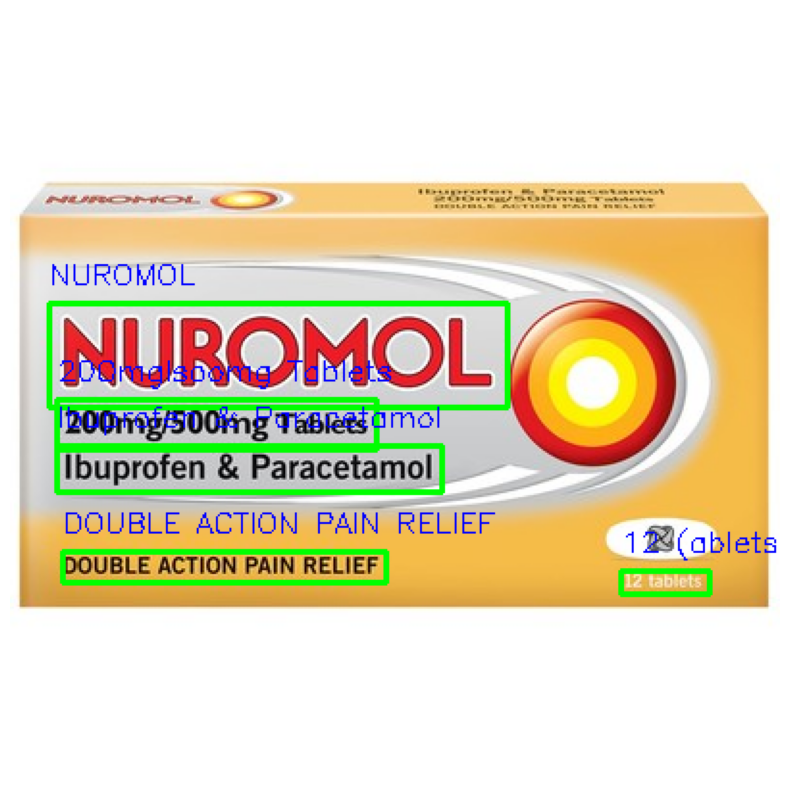

In [20]:
import cv2
import matplotlib.pyplot as plt

def draw_boxes_and_show(image_path, results):
    """
    이미지 위에 OCR로 감지된 텍스트 영역을 박스로 표시하고 텍스트를 그림
    :param image_path: 원본 이미지 경로
    :param results: OCR로 추출된 텍스트 및 박스 정보
    """
    image = cv2.imread(image_path)  # 이미지 로드

    for result in results:
        # 각 결과에서 데이터 추출
        bbox, text, confidence = result  # bbox: [top_left, top_right, bottom_right, bottom_left]

        # 좌상단 좌표와 우하단 좌표 추출
        top_left = tuple(map(int, bbox[0]))  # 좌상단
        bottom_right = tuple(map(int, bbox[2]))  # 우하단

        # 박스 그리기
        box_color = (0, 255, 0)  # 초록색 박스
        cv2.rectangle(image, top_left, bottom_right, box_color, 2)

        # 텍스트 표시 위치 설정 (박스 위나 아래)
        text_position = (top_left[0], max(0, top_left[1] - 10))  # 박스 바로 위
        text_color = (255, 0, 0)  # 파란색 텍스트

        # 텍스트 그리기
        cv2.putText(image, text, text_position,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 1)

    # BGR 이미지를 RGB로 변환 (OpenCV는 기본적으로 BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Matplotlib으로 이미지 출력
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")  # 축 제거
    plt.show()

# OCR 결과 가져오기
results = reader.readtext(image_path)  # OCR 결과 반환 (좌표, 텍스트, 신뢰도 포함)

# 이미지 위에 박스와 텍스트 표시 후 코랩에서 시각화
draw_boxes_and_show(image_path, results)
